# Detecting Malaria cells

## 1. Importing libraries

In [1]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns

import random
import os

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

#from tensorflow.random import set_seed


import warnings
warnings.filterwarnings('ignore')

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
IMG_SIZE = 50
BATCH = 32
SEED = 42

In [7]:
main_path = "C:/Users/Anarchy/Documents/Data_Science/Malaria"


train_Parasitized= glob.glob(main_path+"/Parasitized/*.png")
train_Uninfected = glob.glob(main_path+"/Uninfected/*.png")

train_list = [x for x in train_Parasitized]
train_list.extend([x for x in train_Uninfected])

df_train = pd.DataFrame(np.concatenate([['Parasitized']*len(train_Parasitized) , ['Uninfected']*len(train_Uninfected)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

df_train

,class,image
0,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
1,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
2,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
3,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
4,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
...,...,...
27553,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
27554,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
27555,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
27556,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...


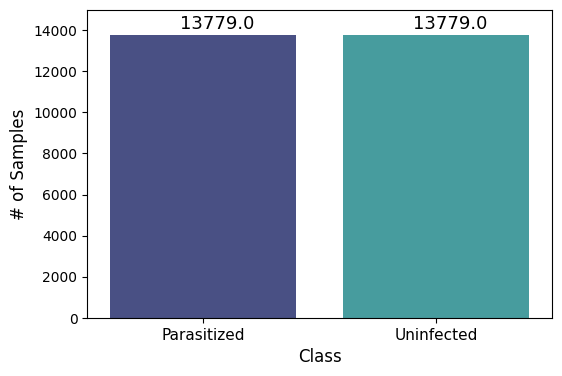

In [9]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1], ['Parasitized', 'Uninfected'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

Parasitized


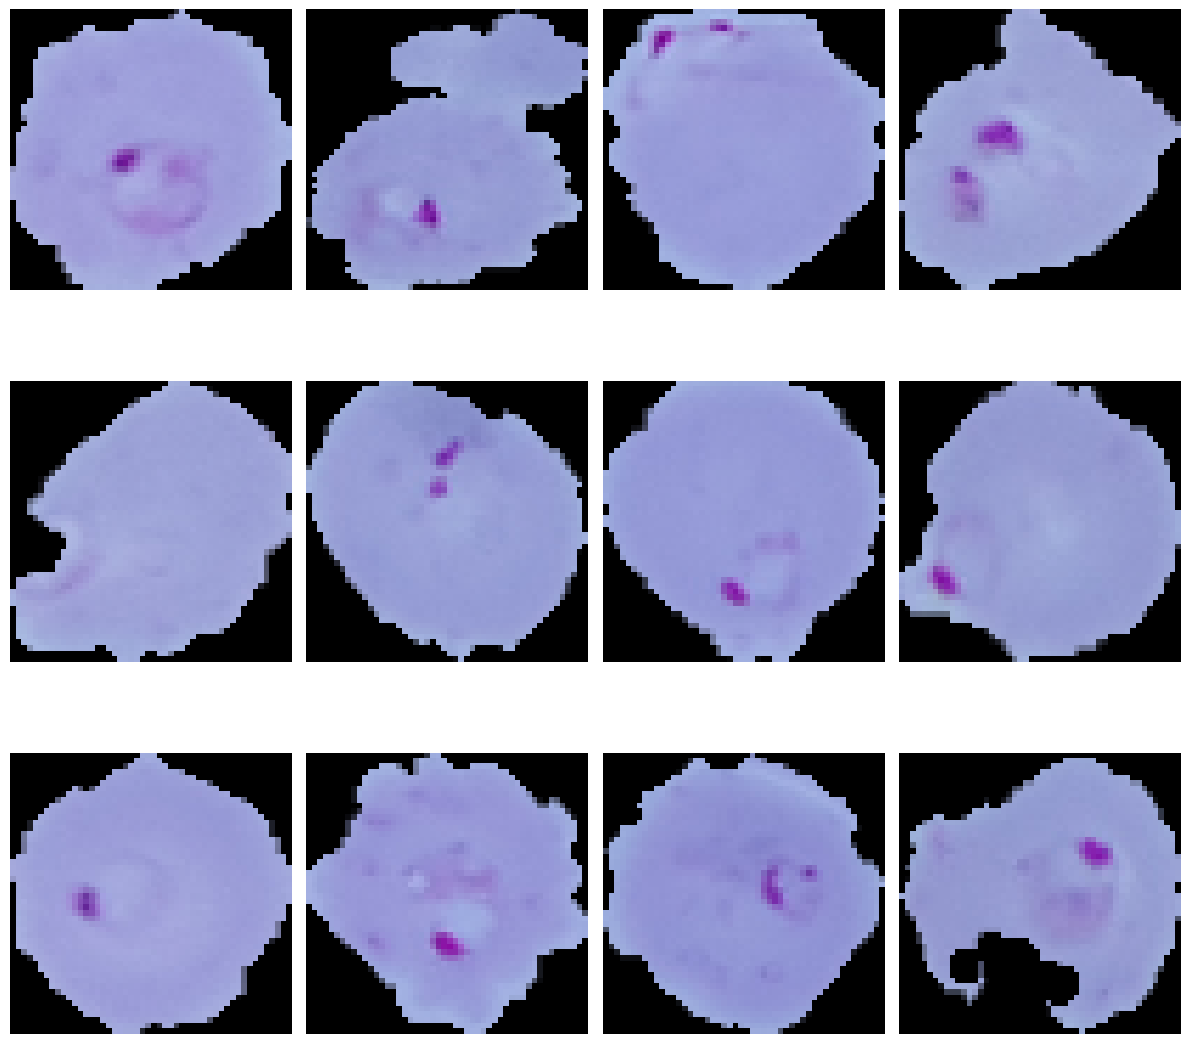

In [12]:
print("Parasitized")
plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_Parasitized[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Uninfected


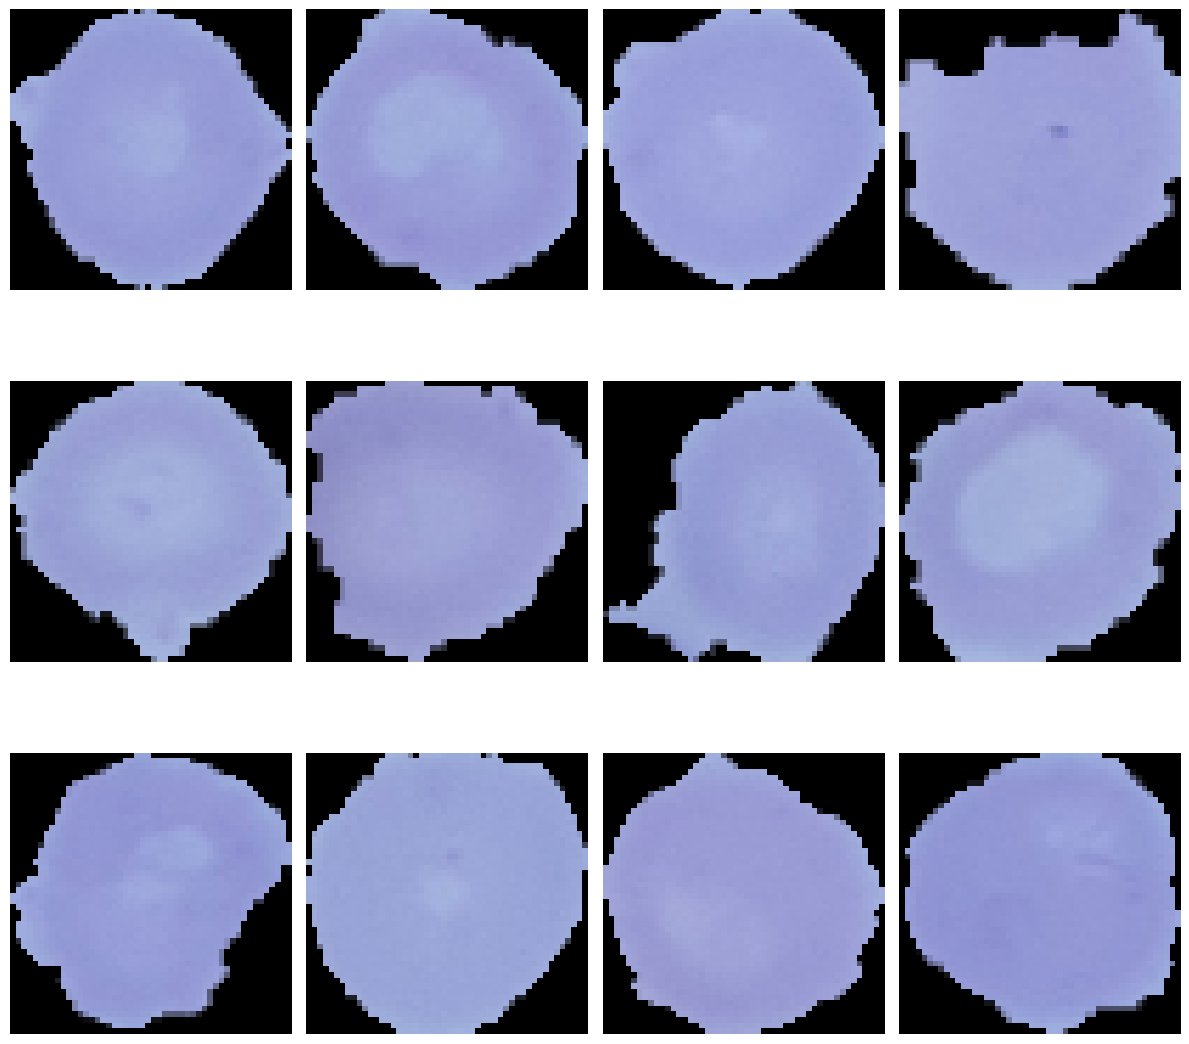

In [13]:
print("Uninfected")
plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_Uninfected[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [14]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [15]:
train_df

,class,image
11623,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
12480,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
13867,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
8024,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
180,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
...,...,...
14816,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
24974,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
858,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
19473,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...


In [16]:
val_df

,class,image
23426,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
894,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
26982,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
10852,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
4146,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
...,...,...
22216,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
1542,Parasitized,C:/Users/Anarchy/Documents/Data_Science/Malari...
15905,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...
22502,Uninfected,C:/Users/Anarchy/Documents/Data_Science/Malari...


In [18]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

Found 22046 validated image filenames belonging to 2 classes.
Found 5512 validated image filenames belonging to 2 classes.


## Custom CNN

In [19]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [20]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [21]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 16)        0     

In [22]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
688/688 [==============================] - 194s 268ms/step - loss: 0.7834 - binary_accuracy: 0.5883 - val_loss: 0.6274 - val_binary_accuracy: 0.6359 - lr: 3.0000e-05
Epoch 2/50
688/688 [==============================] - 33s 47ms/step - loss: 0.6512 - binary_accuracy: 0.6520 - val_loss: 0.6024 - val_binary_accuracy: 0.6653 - lr: 3.0000e-05
Epoch 3/50
688/688 [==============================] - 35s 50ms/step - loss: 0.6171 - binary_accuracy: 0.6761 - val_loss: 0.6069 - val_binary_accuracy: 0.6772 - lr: 3.0000e-05
Epoch 4/50
688/688 [==============================] - 34s 49ms/step - loss: 0.5883 - binary_accuracy: 0.7022 - val_loss: 0.6003 - val_binary_accuracy: 0.6972 - lr: 3.0000e-05
Epoch 5/50
688/688 [==============================] - 33s 48ms/step - loss: 0.5596 - binary_accuracy: 0.7225 - val_loss: 0.5713 - val_binary_accuracy: 0.7253 - lr: 3.0000e-05
Epoch 6/50
688/688 [==============================] - 33s 48ms/step - loss: 0.5301 - binary_accuracy: 0.7429 - val_loss: 0.

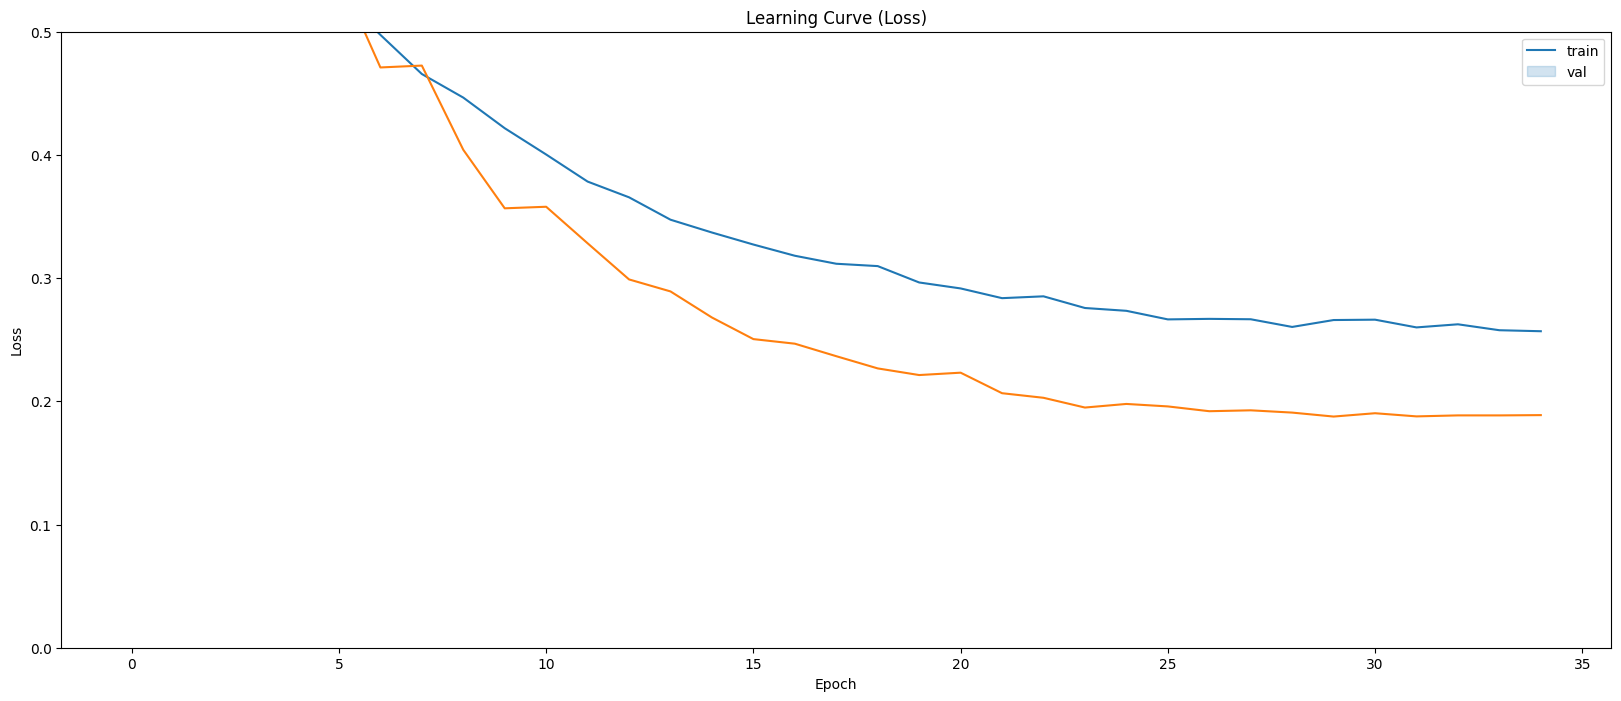

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

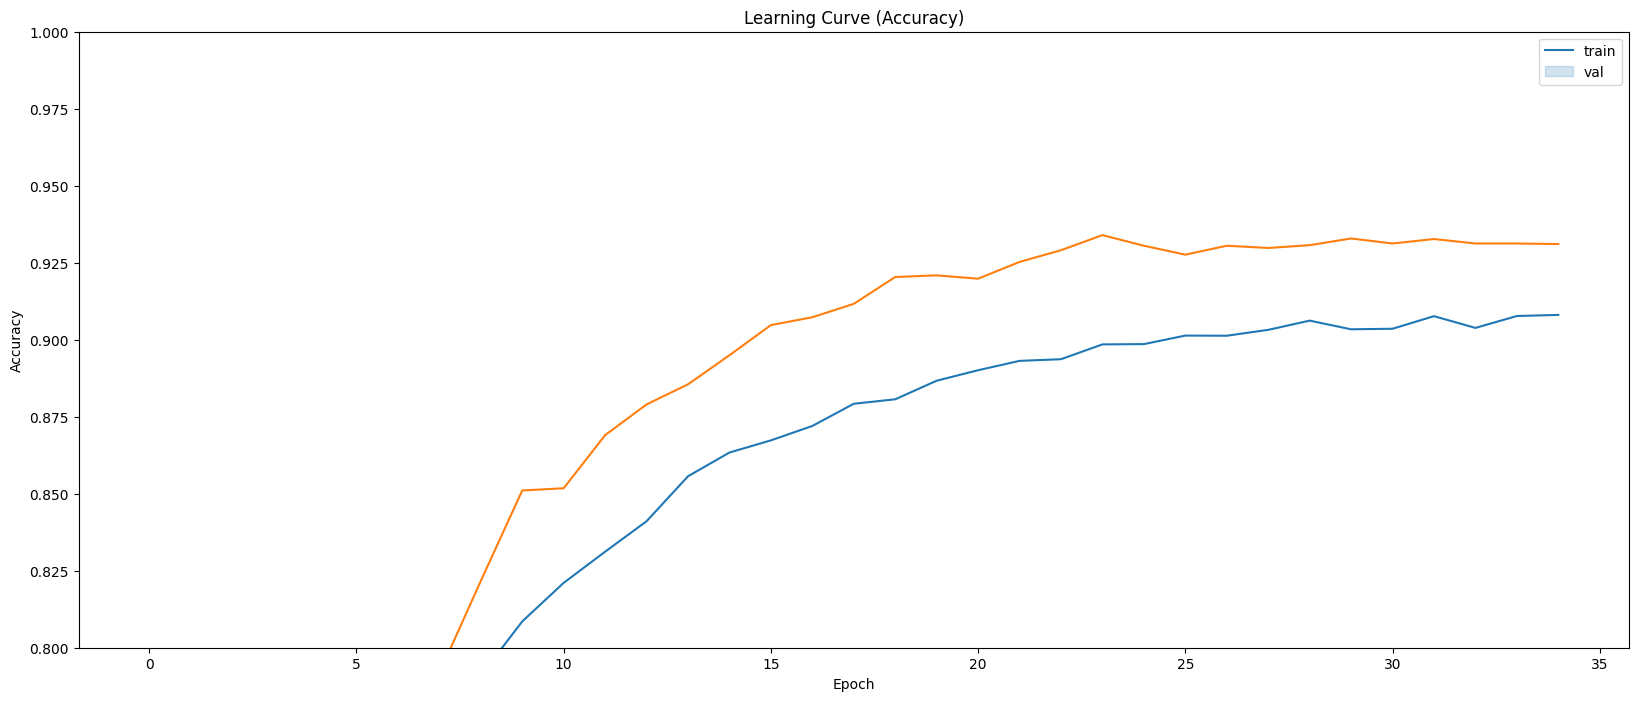

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [25]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.18763408064842224
Val accuracy: 0.9328737258911133


## Transfer learning

In [26]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [27]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [28]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
688/688 [==============================] - 58s 71ms/step - loss: 0.4498 - binary_accuracy: 0.7931 - val_loss: 0.3596 - val_binary_accuracy: 0.8413 - lr: 5.0000e-05
Epoch 2/50
688/688 [==============================] - 43s 62ms/step - loss: 0.3730 - binary_accuracy: 0.8360 - val_loss: 0.3320 - val_binary_accuracy: 0.8554 - lr: 5.0000e-05
Epoch 3/50
688/688 [==============================] - 43s 62ms/step - loss: 0.3564 - binary_accuracy: 0.8418 - val_loss: 0.3208 - val_binary_accuracy: 0.8638 - lr: 5.0000e-05
Epoch 4/50
688/688 [==============================] - 47s 69ms/step - loss: 0.3437 - binary_accuracy: 0.8509 - val_loss: 0.3151 - val_binary_accuracy: 0.8657 - lr: 5.0000e-05
Epoch 5/50
688/688 [==============================] - 50s 73ms/step - loss: 0.3366 - binary_accuracy: 0.8559 - val_loss: 0.3121 - val_binary_accuracy: 0.8677 - lr: 5.0000e-05
Epoch 6/50
688/688 [==============================] - 45s 65ms/step - loss: 0.3340 - binary_accuracy: 0.8537 - val_loss: 0.30

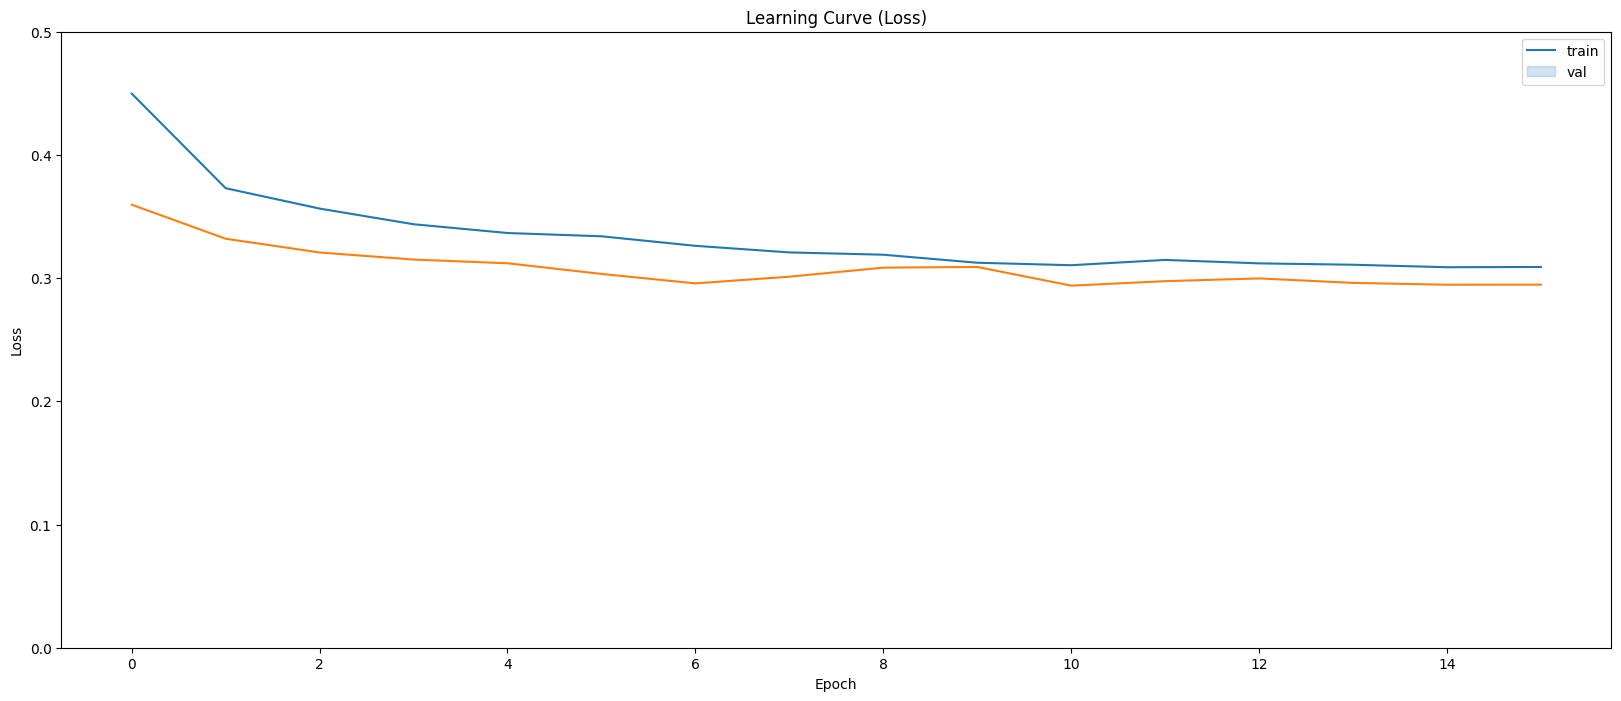

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

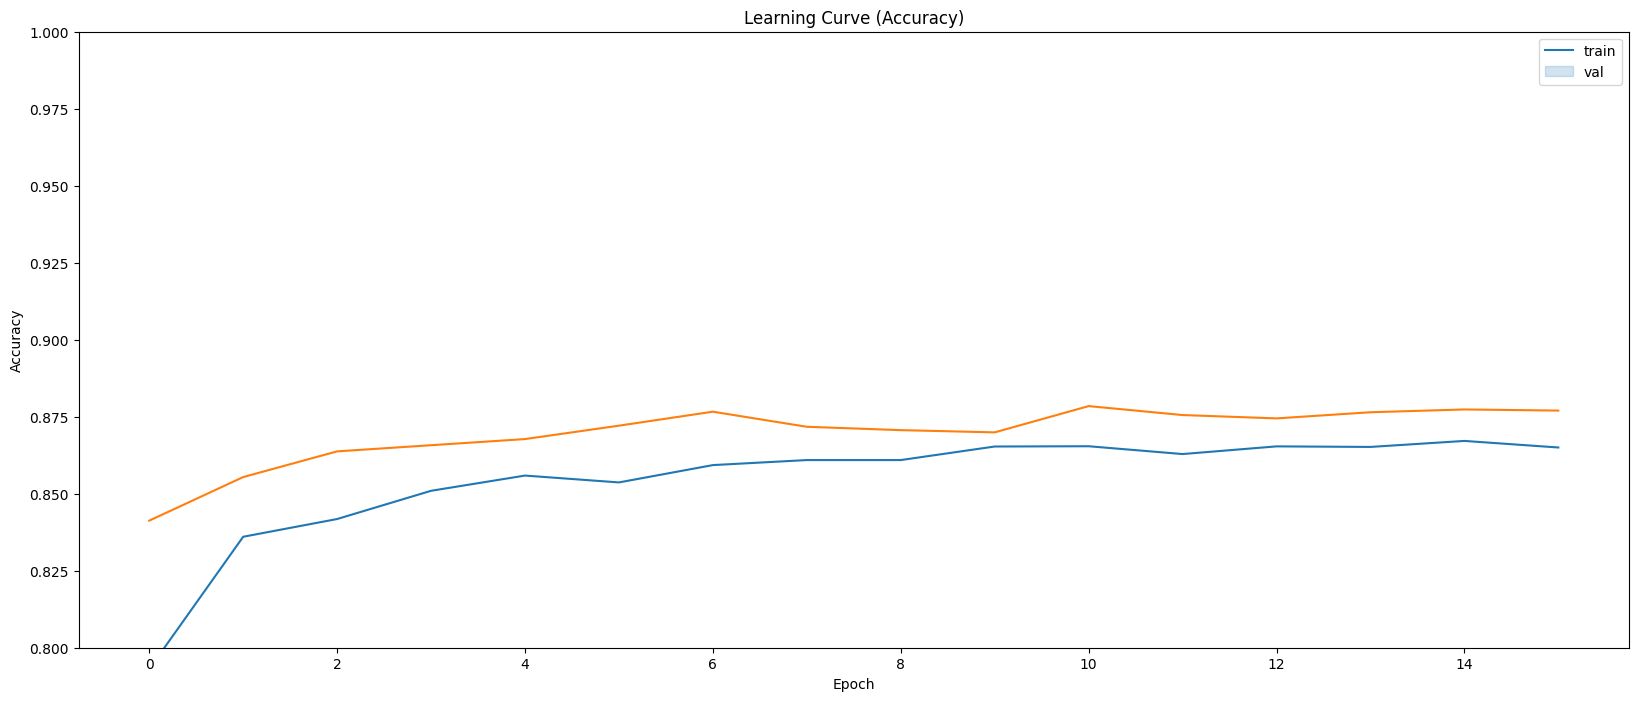

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [31]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.29389330744743347
Val accuracy: 0.8784469962120056


## Fine tuning

In [32]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [33]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [34]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=2e-6), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [35]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
688/688 [==============================] - 61s 76ms/step - loss: 0.4891 - binary_accuracy: 0.7634 - val_loss: 0.4112 - val_binary_accuracy: 0.8300 - lr: 2.0000e-06
Epoch 2/50
688/688 [==============================] - 51s 74ms/step - loss: 0.4294 - binary_accuracy: 0.8134 - val_loss: 0.3976 - val_binary_accuracy: 0.8333 - lr: 2.0000e-06
Epoch 3/50
688/688 [==============================] - 48s 70ms/step - loss: 0.4054 - binary_accuracy: 0.8265 - val_loss: 0.3903 - val_binary_accuracy: 0.8345 - lr: 2.0000e-06
Epoch 4/50
688/688 [==============================] - 48s 69ms/step - loss: 0.4000 - binary_accuracy: 0.8311 - val_loss: 0.3775 - val_binary_accuracy: 0.8394 - lr: 2.0000e-06
Epoch 5/50
688/688 [==============================] - 48s 70ms/step - loss: 0.3869 - binary_accuracy: 0.8330 - val_loss: 0.3693 - val_binary_accuracy: 0.8427 - lr: 2.0000e-06
Epoch 6/50
688/688 [==============================] - 48s 70ms/step - loss: 0.3771 - binary_accuracy: 0.8368 - val_loss: 0.36

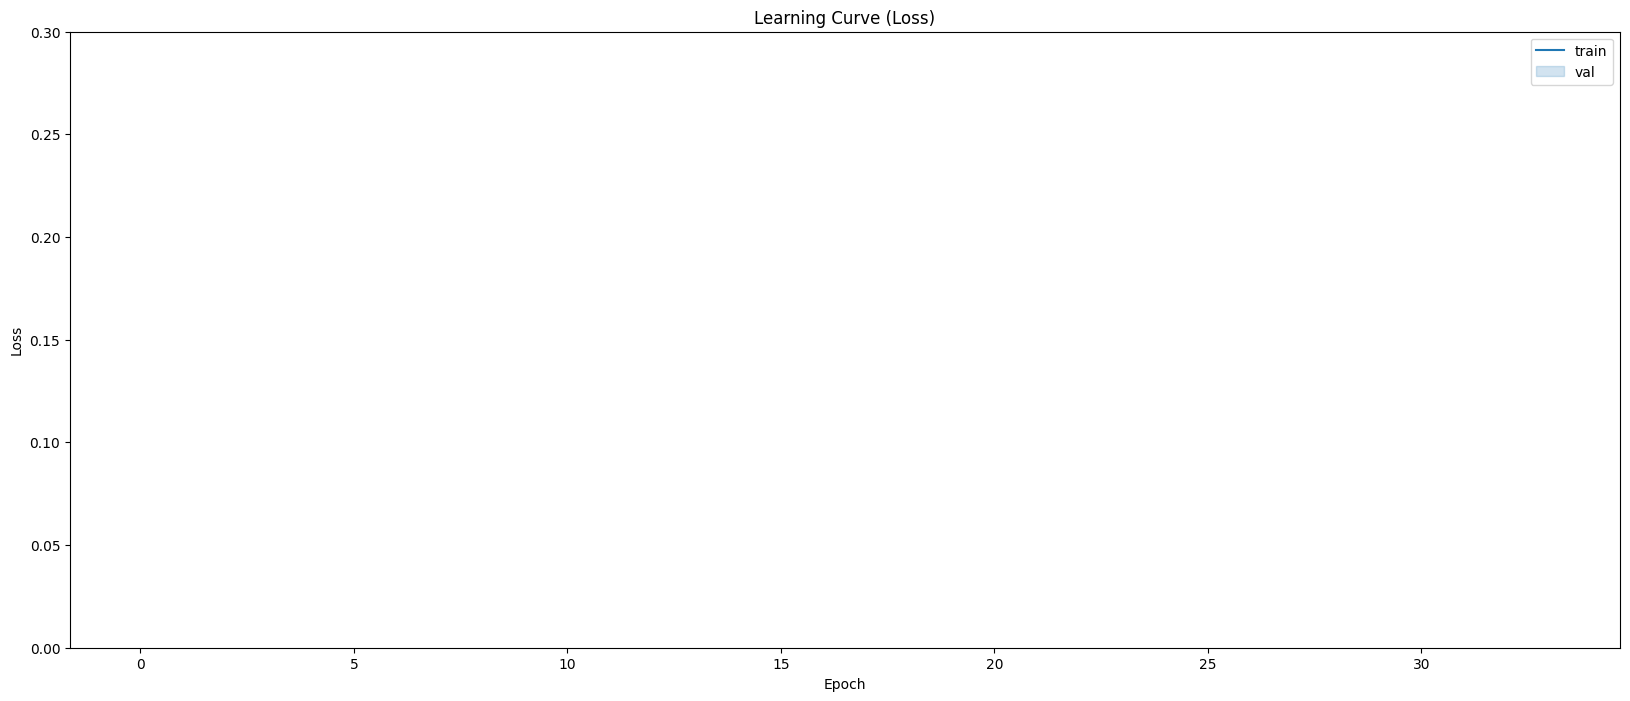

In [36]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

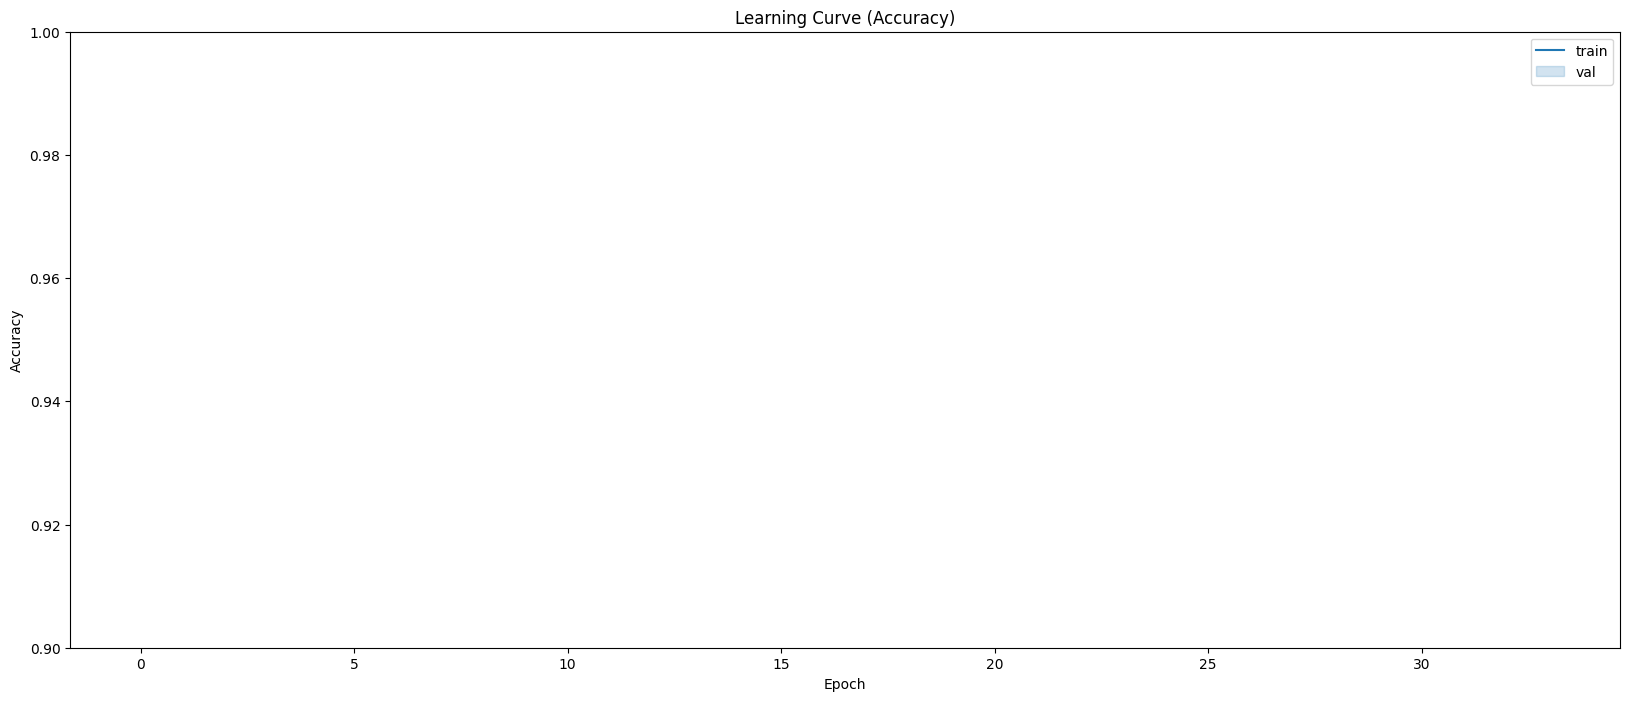

In [37]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [38]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.3045556843280792
Val accuracy: 0.8715530037879944


## Performance Metrics

In [44]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = ds_val['class'].copy().map(num_label).astype('int')


TypeError: '>=' not supported between instances of 'str' and 'int'

In [39]:
ds_val.reset()
predictions = model_pretrained.predict(ds_val, steps=len(ds_val), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [40]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

NameError: name 'Y_test' is not defined